In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, g=lambda x, y:x)
    mean_Y = E(XY, g=lambda x, y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

# 1. 독립성

독립이면 무상관이지만 무상관이면 독립은 아니다

### 독립 > 무상관

In [3]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y/441
    else:
        return 0

XY = [x_set, y_set, f_XY]

In [4]:
Cov(XY)

-8.326672684688674e-17

### 무상관 > 독립이 아닌 예

In [5]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x,y):
    if (x,y) in [(0,0), (1,1), (1,-1)]:
        return 1/3
    else:
        return 0

XY = [x_set, y_set, f_XY]

In [6]:
Cov(XY)

0.0

In [8]:
f_X(0)*f_Y(0), f_XY(0, 0)

(0.1111111111111111, 0.333)

# 2. 합의 분포

$X_1, ...,X_n$이 모두 독립일 때  $ E(X_1+...+X_n) = E(X_1)+...+E(X_n) \\ V(X_1+...+X_n)=V(X_1)+...+V(X_n)$

## 2-1. 정규분포

In [9]:
rv1 = stats.norm(1, np.sqrt(2)) # E(X)=1, V(X)=2
rv2 = stats.norm(2, np.sqrt(3)) # E(Y)=2, V(Y)=3

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample) # E(X+Y)=3, V(X+Y)=5

(3.0026658204893835, 4.9960524321119335)

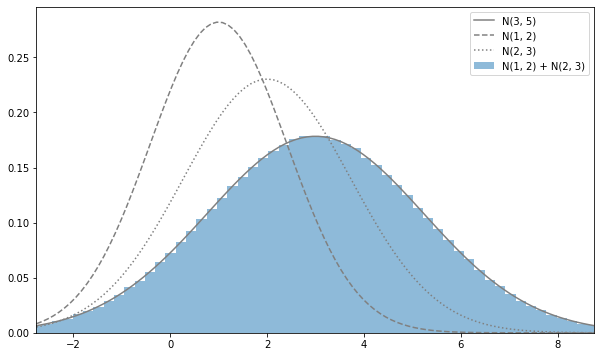

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
       alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

## 2-2. 포아송 분포

In [12]:
rv1 = stats.poisson(3) # E(X)=3, V(X)=3
rv2 = stats.poisson(4) # E(Y)=4, V(X)=4

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample) # E(X+Y)=7, V(X+Y)=7

(6.999034, 6.989995066843997)

C:\Users\master\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


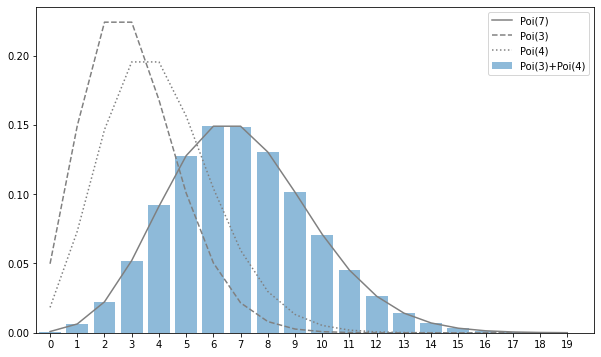

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)

hist, _ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3)+Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

## 2-3. 베르누이 분포

In [15]:
p = 0.3
rv = stats.bernoulli(p) # E(X) = np = 3, V(X) = np(1-p) = 2.1

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999494, 2.0946717439639984)

C:\Users\master\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


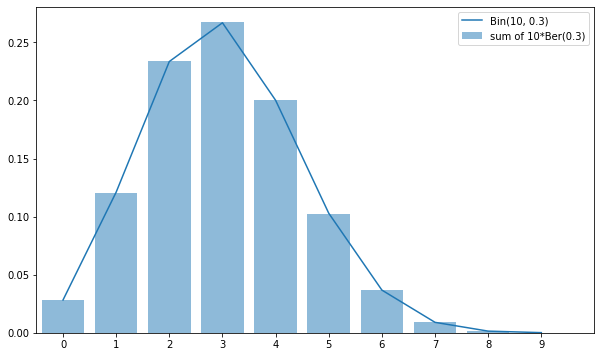

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)

hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)

ax.bar(xs, hist, alpha=0.5, label='sum of 10*Ber(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')

ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

# 3. 표본평균의 분포

$X_1, ...,X_n$이 모두 독립이고 기댓값이 $\mu$, 분산이 $\sigma^2$일 때 표본평균 $\bar X$에 대하여  
$E(\bar X) = \mu, \ V(\bar X) = {\sigma^2 \over n}$

## 3-1. 정규분포

In [17]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean) # E(X_bar)=1, V(X_bar)=2/10=0.2

(0.9995466511402974, 0.19942119653587653)

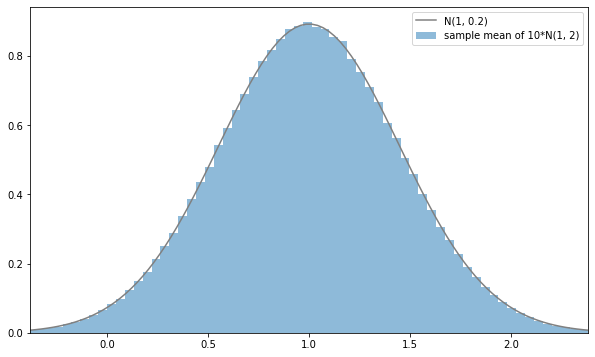

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

## 3-2. 포아송 분포

In [22]:
l = 3
rv = stats.poisson(l) # E(X)=3, V(X)=3

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean) # E(X_bar)=3, V(X_bar)=3/10=0.3

(3.000380999999999, 0.300019094839)

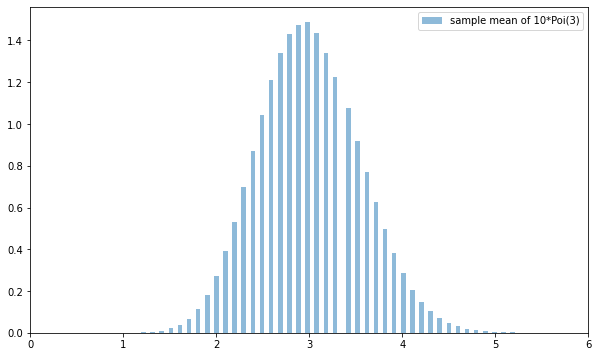

In [23]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, 
       alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

## 3-3. 중심극한정리

$X_1, ...,X_n$이 독립이고 기댓값이 $\mu$, 분산이 $\sigma^2$일 때 $n$이 커짐에 따라 $\bar X \sim N(\mu, {\sigma^2 \over n})$

### 포아송 분포

In [27]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

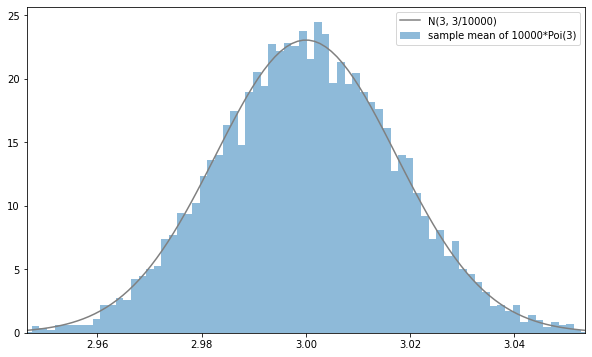

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 베르누이 분포

In [29]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

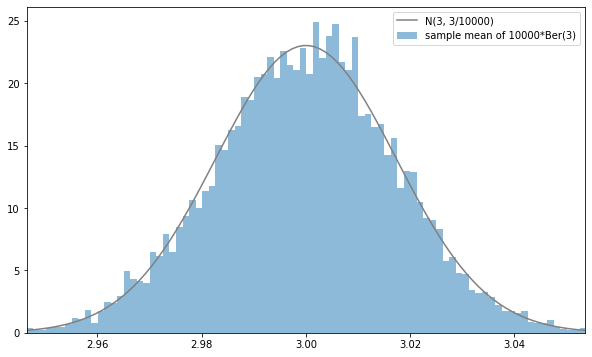

In [30]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='sample mean of 10000*Ber(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

## 3-4. 대수의 법칙

$X_1, ...,X_n$이 독립이고 기댓값이 $\mu$, 분산이 $\sigma^2$일 것 같은 분포를 따를 때 $n$이 커짐에 따라 표본평균은 $\mu$에 수렴

In [40]:
p = 1/6
rv = stats.bernoulli(p)

# 표본크기가 10만인 무작위추출을 4번 실행
n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T

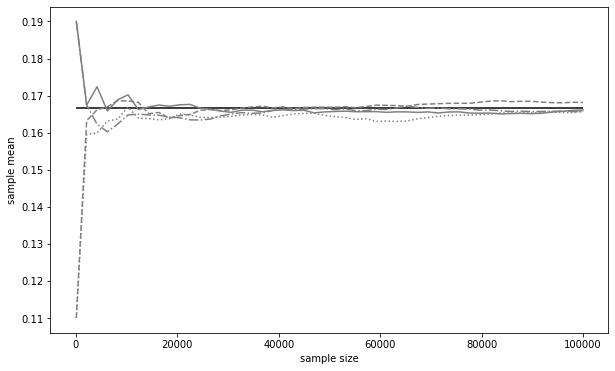

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()